In [ ]:
import torch


***tensor*** are defined as the tool to hold data in different formats like scalar, arrays,matrices or n-dimensional array,which are used to accelerate the processing by incorporating themselves with gpu.eg- 0 dimensional tensor,

In [ ]:
t1=torch.tensor(4.)
t1

tensor(4.)

2-dimensional tensor




In [ ]:
t2=torch.tensor([[5,6],
                 [7,8],
                 [9,10]])
t2

tensor([[ 5,  6],
        [ 7,  8],
        [ 9, 10]])

In [ ]:
x=torch.tensor(3.)
w=torch.tensor(4., requires_grad=True)
b=torch.tensor(5., requires_grad=True)
x , w , b

(tensor(3.), tensor(4., requires_grad=True), tensor(5., requires_grad=True))

We've created three tensors: x, w, and b, all numbers. w and b have an additional parameter requires_grad set to True. We'll see
what it does in just a moment.
Let's create a new tensor y by combining these tensors.

***PyTorch tensors can be initialized with the argument requires_grad , which when set to True , stores the tensor's gradient in an attribute called grad. requires_grad=True argument to the tensor constructor telling PyTorch to track the entire family tree of tensors resulting from operations on params.***

In [ ]:
y = w * x + b
y

tensor(17., grad_fn=<AddBackward0>)

In [ ]:
y.backward()



The derivatives of y with respect to the input tensors are stored in the .grad property of the respective tensors.

In [ ]:
print('dy/dx:', x.grad)
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


As expected, dy/dw has the same value as x, i.e., 3, and dy/db has the value 1. Note that x.grad is None because x doesn't have
requires_grad set to True.
The "grad" in w.grad is short for gradient, which is another term for derivative. The term gradient is primarily used while dealing with
vectors and matrices.

In [ ]:
import numpy as np

In [ ]:
x=np.array([[1, 2],
 [3 , 4.]])
x

array([[1., 2.],
       [3., 4.]])

In [ ]:
y=torch.from_numpy(x)
y

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [ ]:
x.dtype,y.dtype

(dtype('float64'), torch.float64)

The distinction between a NumPy array and a tensor is that tensors, unlike NumPy arrays, are supported by accelerator memory such as the GPU, they have a faster processing speed.

***Regression Model***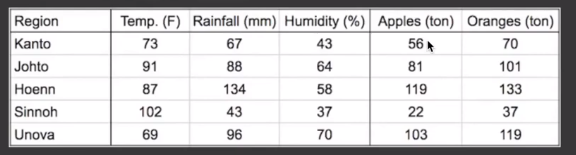

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
inputs=np.array([[73,67,43],
                 [91,88,64],
                 [87,134,58],
                 [102,43,37],
                 [69,96,70]],dtype='float32')

In [ ]:
targets=np.array([[56,70],
                  [81,101],
                  [119,133],
                  [22,37],
                  [103,119]],dtype='float32')

In [ ]:
inputs=torch.from_numpy(inputs)
targets=torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [ ]:
w=torch.randn(2,3,requires_grad=True)
b=torch.randn(2,requires_grad=True)
print(w)
print(b)

tensor([[ 0.1223, -1.6340,  1.7101],
        [ 0.5661,  0.0402, -0.4406]], requires_grad=True)
tensor([1.8321, 0.3492], requires_grad=True)


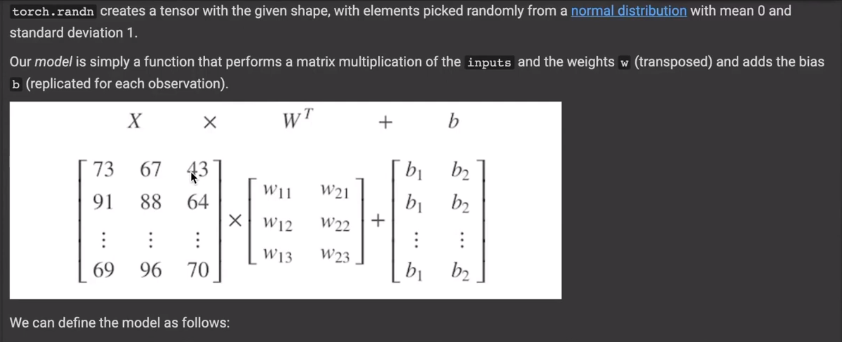

In [ ]:
inputs

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])

In [ ]:
inputs @ w.t()+b

tensor([[ -25.1906,   25.4168],
        [ -21.3932,   27.1969],
        [-107.3090,   29.4237],
        [   7.3119,   43.5119],
        [ -26.8950,   12.4216]], grad_fn=<AddBackward0>)

In [ ]:
def model(x):
  return x @ w.t()+b


@ represents matrix multiplication in PyTorch, and the **.t** method returns the transpose of a tensor.
 The matrix obtained by passing the input data into the model is a set of predictions for the target variables.

In [ ]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [ ]:
preds=model(inputs)
print(preds)

tensor([[ -25.1906,   25.4168],
        [ -21.3932,   27.1969],
        [-107.3090,   29.4237],
        [   7.3119,   43.5119],
        [ -26.8950,   12.4216]], grad_fn=<AddBackward0>)


In [ ]:
diff= preds - targets
diff=diff*diff
torch.sum(diff)/diff.numel()

tensor(11494.4473, grad_fn=<DivBackward0>)

In [ ]:
def mse(t1,t2):
  difference = t1-t2
  return torch.sum(difference*difference)/difference.numel()

In [ ]:
loss=mse(preds,targets)
print(loss)

tensor(11494.4473, grad_fn=<DivBackward0>)


Here's how we can interpret the result: On average, each element in the prediction differs from the actual target by the square root of the
loss. And that's pretty bad, considering the numbers we are trying to predict are themselves in the range 50-200. The result is called the
loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower
the loss, the better the model.

In [ ]:
loss.backward()

In [ ]:
print(w)
print(w.grad)

tensor([[ 0.1223, -1.6340,  1.7101],
        [ 0.5661,  0.0402, -0.4406]], requires_grad=True)
tensor([[ -9078.9043, -11575.4570,  -6561.2788],
        [ -5134.2988,  -6662.4985,  -3973.4902]])


In [ ]:
print(b)
print(b.grad)

tensor([1.8321, 0.3492], requires_grad=True)
tensor([-110.8952,  -64.4058])


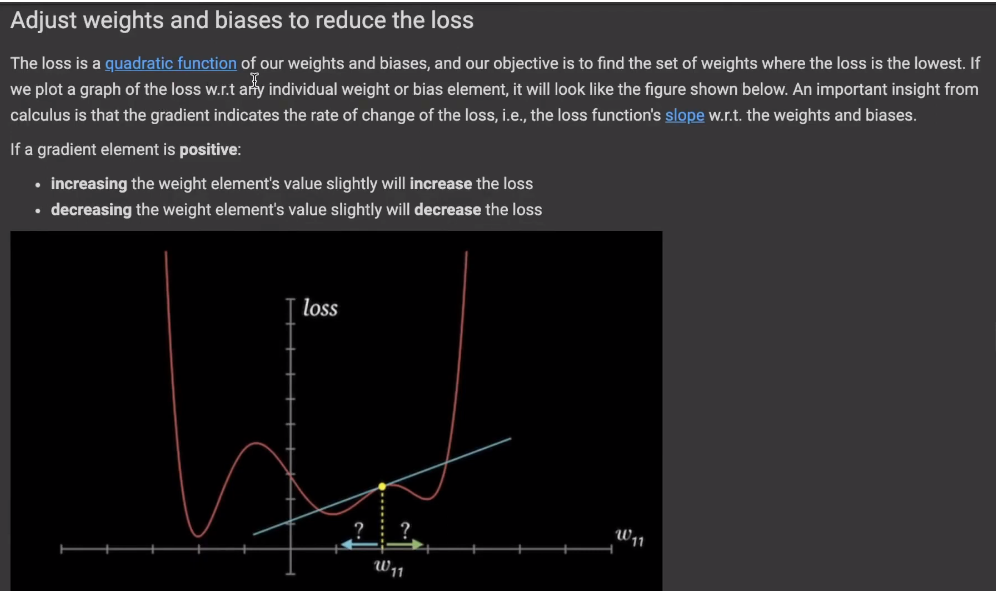

In [ ]:
print(w)
print(w.grad)
print(b)
print(b.grad)

tensor([[ 0.1223, -1.6340,  1.7101],
        [ 0.5661,  0.0402, -0.4406]], requires_grad=True)
tensor([[ -9078.9043, -11575.4570,  -6561.2788],
        [ -5134.2988,  -6662.4985,  -3973.4902]])
tensor([1.8321, 0.3492], requires_grad=True)
tensor([-110.8952,  -64.4058])


In [ ]:
with torch.no_grad():
  w-= w.grad * 1e-5
  b-= b.grad * 1e-5

We multiply the gradients with a very small number (10^-5 in this case) to ensure that we don't modify the weights by a very large
amount. We want to take a small step in the downhill direction of the gradient, not a giant leap. This number is called the learning rate of
the algorithm.

***The use of "with torch. no_grad()" is like a loop where every tensor inside the loop will have requires_grad set to False. It means any tensor with gradient currently attached with the current computational graph is now detached from the current graph***

***GRADIET DESCENT***
Gradient descent is a simple and powerful optimization algorithm used in machine learning and deep learning to find the minimum (or maximum) of a function, like a cost function or an error metric. Let's break it down in simpler terms:

Imagine you are standing on a hill, and you want to reach the lowest point, which represents the bottom of the hill (the minimum of the function). However, it's foggy, and you can't see the landscape clearly. To find your way down, you can take small steps in the direction of the steepest slope, where the ground descends the most rapidly.

Now, each step you take is like making a guess about where the bottom of the hill might be. As you take these steps, you feel the ground below your feet to sense how the slope is changing. The slope at your current position tells you the direction in which you should move to go downhill faster.

In the context of optimization, the "slope" is called the "gradient." The gradient is a vector that points in the direction of the steepest increase of the function. So, you move in the opposite direction of the gradient to decrease the function value, which means you're getting closer to the minimum.

The size of each step you take is called the "learning rate." A larger learning rate means taking bigger steps, and a smaller learning rate means smaller steps. The choice of the learning rate is essential because if it's too large, you might overshoot the minimum, and if it's too small, you'll take tiny steps and might need a long time to reach the bottom.

As you keep taking steps downhill, you gradually get closer to the bottom of the hill, and eventually, you'll reach the minimum point (or get very close to it). This process of taking steps in the direction of the steepest slope (opposite to the gradient) is what we call "gradient descent."

In machine learning, the "hill" represents the space of possible model parameters, and the "bottom" represents the best values for those parameters that minimize the error on the training data. By using gradient descent, we adjust the model's parameters iteratively, step by step, to find the best combination that fits the data as accurately as possible.


In [ ]:
w,b

(tensor([[ 0.2131, -1.5183,  1.7757],
         [ 0.6174,  0.1068, -0.4008]], requires_grad=True),
 tensor([1.8332, 0.3499], requires_grad=True))

In [ ]:
preds=model(inputs)
loss=mse(preds,targets)
print(loss)

tensor(8342.1787, grad_fn=<DivBackward0>)


In [ ]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


Imagine you are a student learning to ride a bike, and you want to improve your riding skills by adjusting the bike's handle, seat, and pedals. You keep track of how much you need to adjust each part (the gradients) to improve your balance and control. However, before starting each new practice session, you want to start with a clean slate and reset all the adjustments you made during the previous session.

In a similar way, neural networks in machine learning keep track of how much each parameter needs to be adjusted to improve their performance on a specific task. These adjustments are called gradients. By using grad.zero(), you are telling the neural network to forget about the adjustments made during the previous training iteration and start fresh with all gradients set to zero.

This is typically done before performing a new forward and backward pass during the training process. It ensures that the gradients from the previous iteration don't interfere with the new gradients computed in the current iteration. It's like clearing the slate before making new adjustments to the model's parameters based on the most recent data and predictions.

Train the model using gradient descent
As seen above, we reduce the loss and improve our model using the gradient descent optimization algorithm. Thus, we can train the
model using the following steps:
1. Generate predictions
2. Calculate the loss
3. Compute gradients w.r.t the weights and biases
4. Adjust the weights by subtracting a small quantity proportional to the gradient
5. Reset the gradients to zero



# TRAINING DATA FOR MULTIPLE **EPOCHES**

In [ ]:
for i in range(1100):
  preds=model(inputs)
  loss=mse(preds,targets)
  loss.backward()
  learning_rate=1e-5
  with torch.no_grad():
    w -= w.grad * learning_rate
    b -= b.grad * learning_rate
    w.grad.zero_()
    b.grad.zero_()



In [ ]:
print(loss)

tensor(0.7563, grad_fn=<DivBackward0>)
